# Aarav Gosalia

## Research question/interests
**How has literacy rate changed in different region groups and countries and what could be some reasons for the changes**

Briefly describe your research question or interests here.

I have used lineplots to show how countries with 3 or more years of data recording's literacy rate has changed. There are also two barplots showing the percentage change of literacy rates in those countries and the average percentage change for each region group. I will try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions1 as pf
pd.options.mode.chained_assignment = None
sns.set_theme(style="ticks", font_scale=0.8)

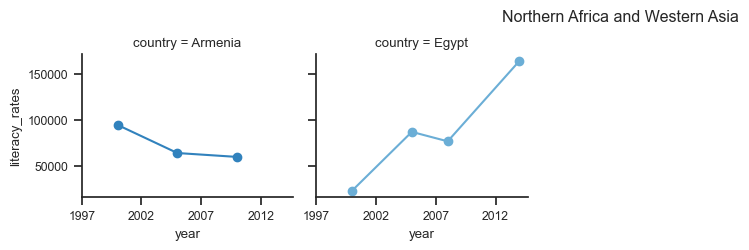

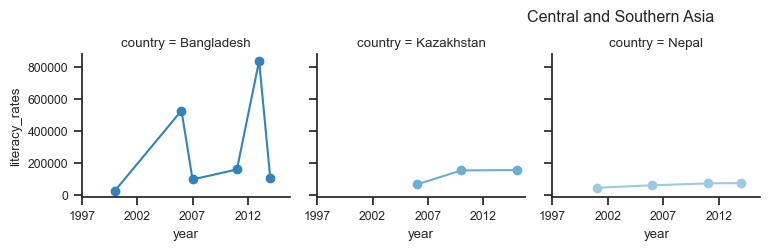

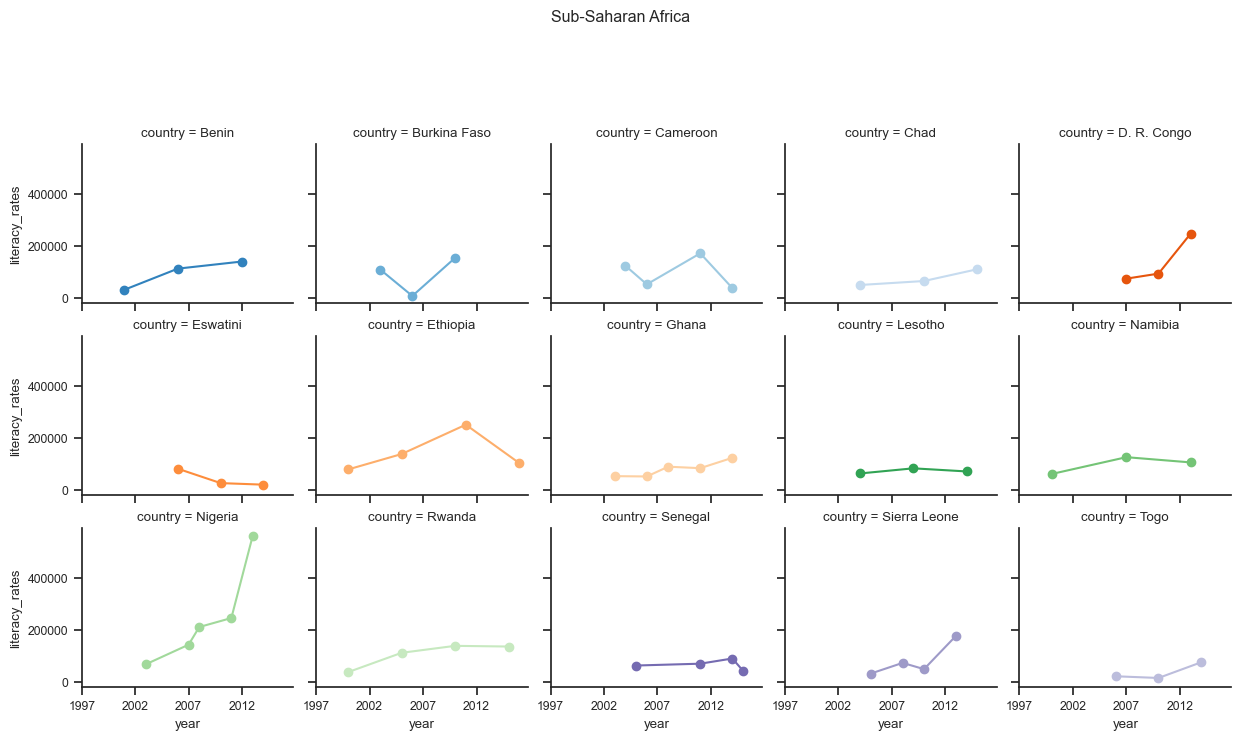

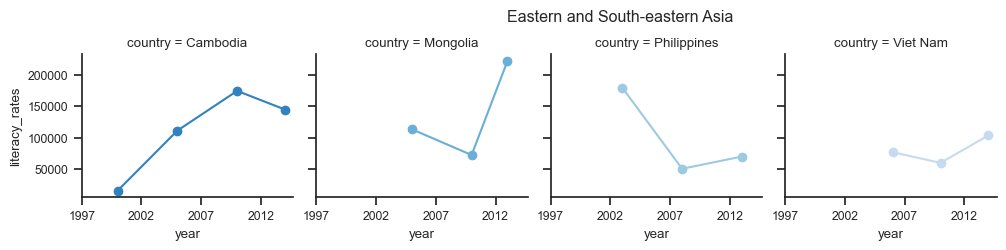

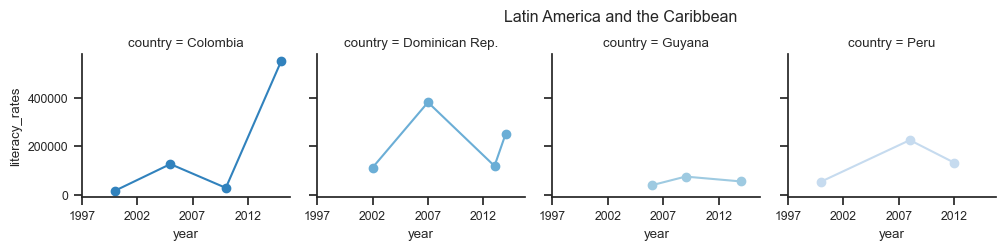

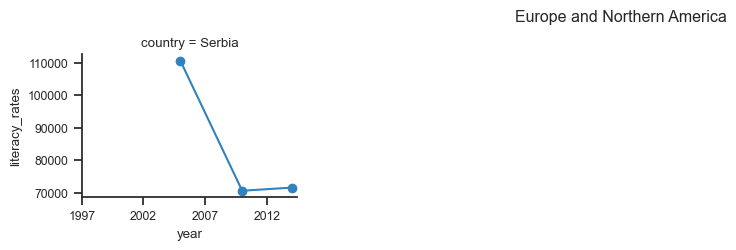

In [2]:
data_processed = pf.data_processing("../data/raw/dataset_raw.csv")
dictionary = pf.plotting(data_processed)
pf.lineplot(dictionary)

- For Northern Africa and Western Asia there has been no particular trend in literacy rates and is very much relative to the country rather than the region as a whole as.
- For Central and Southern Asia, there is a slight increase in literacy rates year on year, with bangladesh being the exception with a very volatile literacy rate graph.
- For Sub-Saharan Africa, there has been a general increase in literacy rates with the exceptions being Cameroon, Ethiopia, and Senegal
- For Eastern and South-eastern Asia, there has been a significant increase in literacy rates in all countries, except the phillipines which has seen a significant decrease
- For Latin America and the Caribbean, there has been a visible increase in literacy rates, but there has been a noticeable increase followed by a similar decrease in most countries.

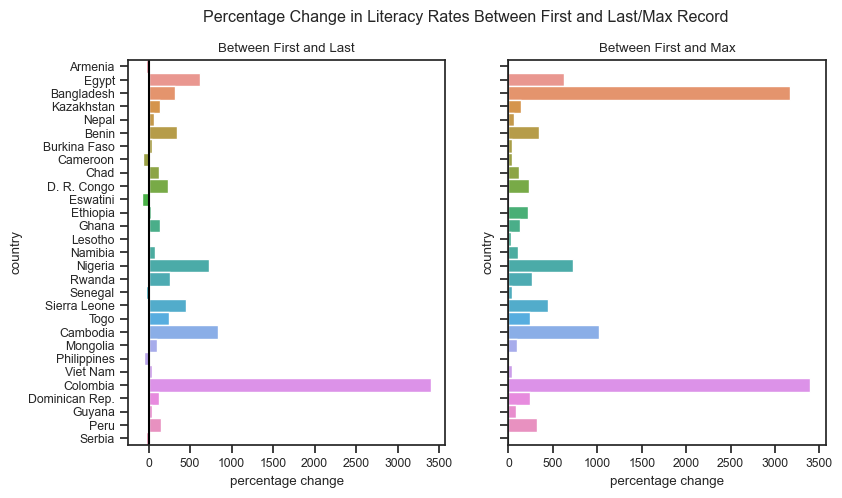

In [3]:
data_plot1,data_plot2,data_plot3,data_plot4,data_plot5 = pf.more_processing(dictionary)
pf.barplot1(data_plot1,data_plot2)

- Most countries have seen a positive change to literacy rates except a few which have no particular correlation to geographical location
- There has been some significant change to countries like Columbia, Cambodia, Nigeria, and Egypt and since they have no correlation to geographical location either there have to be policy changes within the countries themselves

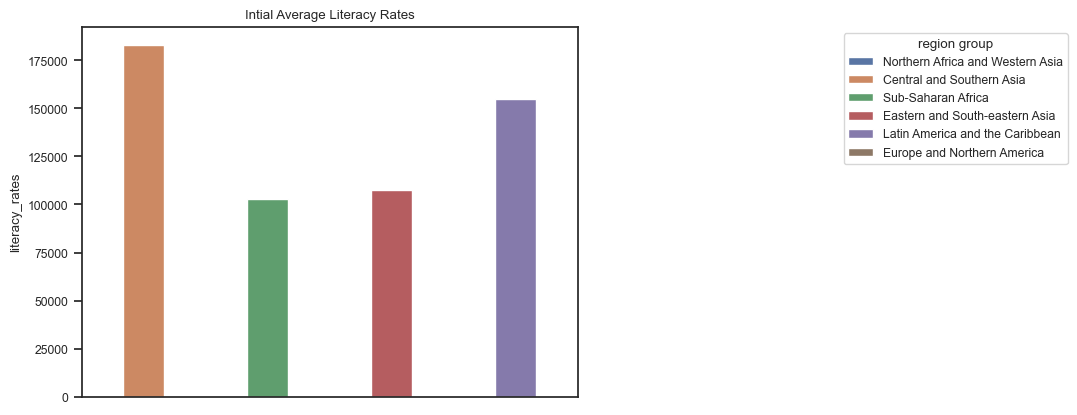

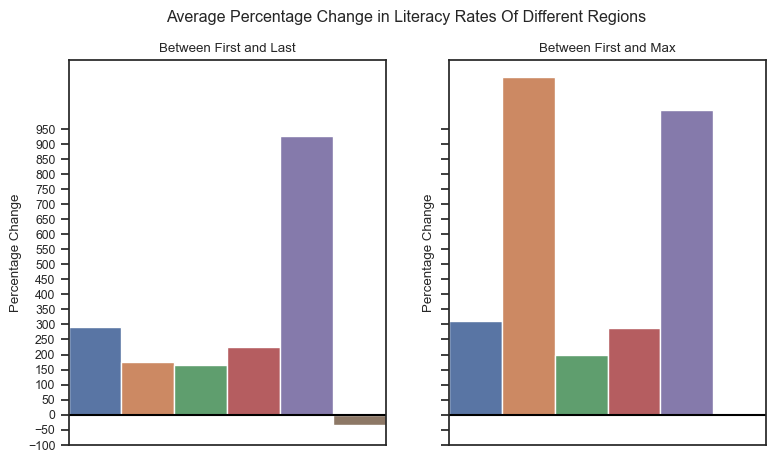

In [4]:
pf.barplot2(data_plot3,data_plot4,data_plot5)
# can create barplot of percentage change from first to max values and min values 

- There has been an increase in literacy rates amongst all the regions except Europe and Northern America but since that value is based on one country only it can be considered as irrelevant
- Asian countries have seen a relatively lower increase in literacy rates with the largest increase being in Latin American and Caribbean countries